In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [4]:
Nv = 3

In [5]:
zeta = symbols('\zeta') 

In [6]:
vec = sympy.zeros(Nv)
vec_int = sympy.zeros(Nv)
vec_int[0] = 1 
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ 2
    vec_int[jj] = (sympy.sqrt(jj-1)/sympy.sqrt(jj))*vec_int[jj-2]

In [7]:
vec[0, :]

Matrix([[1/2, sqrt(2)/2, sqrt(3)/2]])

In [8]:
vec_int[0, :]

Matrix([[1, 0, sqrt(2)/2]])

In [9]:
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [10]:
A

Matrix([
[  0,       1/2,         0],
[1/2,         0, sqrt(2)/2],
[  0, sqrt(2)/2,         0]])

In [11]:
I = np.eye(Nv)

In [12]:
M = sympy.Matrix(I*zeta - A)

In [13]:
sympy.simplify(M.inv())

Matrix([
[(0.5*\zeta**2 - 0.25)/(\zeta*(0.5*\zeta**2 - 0.375)),    0.125/(0.25*\zeta**2 - 0.1875),          1.0*sqrt(2)/(\zeta*(4.0*\zeta**2 - 3.0))],
[                         0.25/(0.5*\zeta**2 - 0.375),  0.5*\zeta/(0.5*\zeta**2 - 0.375),               0.25*sqrt(2)/(0.5*\zeta**2 - 0.375)],
[            1.0*sqrt(2)/(\zeta*(4.0*\zeta**2 - 3.0)), 0.5*sqrt(2)/(1.0*\zeta**2 - 0.75), (4.0*\zeta**2 - 1.0)/(\zeta*(4.0*\zeta**2 - 3.0))]])

In [14]:
(sympy.ones(Nv))[0, :]

Matrix([[1, 1, 1]])

In [15]:
print_latex(sympy.simplify((vec_int[0, :]).dot(sympy.simplify(sympy.simplify(M.inv()[:, 1]/2)))))

\frac{0.125}{0.25 \zeta^{2} - 0.1875}


# Kinetic response function 

In [16]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return -(1 + xi*Z_fun(xi))

def RHP3(xi):
    xi = xi*np.sqrt(2)
    return (-1j*xi + 1.596)/(-1j*(xi**3) + 1.596*(xi**2) + 3*1j*xi -1.596)

def RHP4(xi):
    xi = xi*np.sqrt(2)
    return (xi**2 + 3.519*1j*xi -5.615)/(xi**4 + 3.519*1j*(xi**3) -8.615*(xi**2) -10.556*1j*xi + 5.615)

def R3(xi):
    return (0.125)/(0.25*(xi**2) - 0.1875)

def R4(xi):
    return (256*(xi**2) - 96.0)/(512*(xi**4) - 768*(xi**2) + 96)

def R5(xi):
    return (0.125 * (xi**2 - 1))/(0.25*(xi**4) - 0.625*(xi**2) + 0.234375)

def R6(xi):
    return (4096 * (xi**4 )- 9216 * (xi**2) + 1920)/(8192*(xi**6) - 30720*(xi**4) + 23040*(xi**2) - 1920)
    
def R20(xi):
    return sympy.lambdify(zeta, sympy.simplify((vec_int[0, :]).dot(sympy.simplify(sympy.simplify(M.inv()[:, 1]/2)))))(xi)

In [17]:
xi = 10**np.linspace(-2, 2, int(1e3))

In [18]:
R_3 = R3(xi)
R_HP3 = RHP3(xi)
R_HP4 = RHP4(xi)
R_4 = R4(xi)
R_5 = R5(xi)
R_20 = R20(xi)
R_true = R(xi)

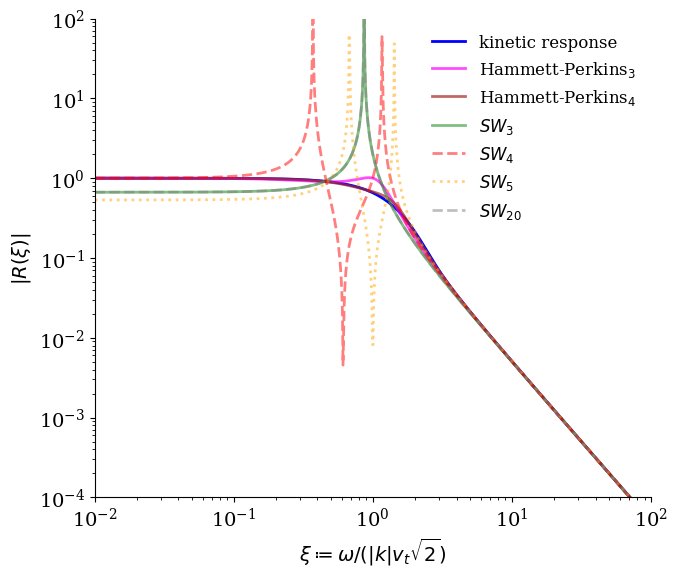

In [19]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.abs(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.abs(R_HP3), label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_HP4), label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_3), label=r"$SW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_4), label=r"$SW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_5), label=r"$SW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_20), label=r"$SW_{20}$", c="grey", ls="--", linewidth=2, alpha=0.5)
ax.set_ylim(10**-4, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_SW.png", dpi=600)

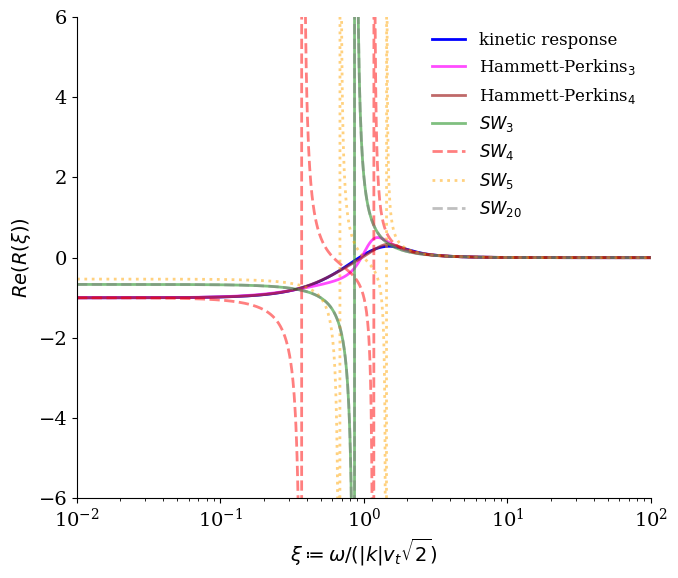

In [20]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.real(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.real(R_HP3), label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_HP4), label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_3), label=r"$SW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_4), label=r"$SW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_5), label=r"$SW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_20), label=r"$SW_{20}$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(-6, 6)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Re(R(\xi))$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figs/symbolic_response_function_SPS_real_SW.png", dpi=600)

In [21]:
n,d = sympy.fraction(R5(zeta))
d

0.25*\zeta**4 - 0.625*\zeta**2 + 0.234375